<a href="https://colab.research.google.com/github/vivekvardhan30/NNFL-Project/blob/main/ANN_CODE_With_Adam_SGD_RMS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:

#import libraries
import numpy as np
import pandas as pd
import tensorflow as tf

In [2]:
dataset = pd.read_csv('heart_disease_risk_dataset_earlymed.csv')

In [3]:
#partial view of dataset from top
dataset.head()

,Chest_Pain,Shortness_of_Breath,Fatigue,Palpitations,Dizziness,Swelling,Pain_Arms_Jaw_Back,Cold_Sweats_Nausea,High_BP,High_Cholesterol,Diabetes,Smoking,Obesity,Sedentary_Lifestyle,Family_History,Chronic_Stress,Gender,Age,Heart_Risk
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,48.0,0.0
1,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,46.0,0.0
2,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,66.0,0.0
3,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,60.0,1.0
4,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,69.0,0.0


In [4]:
#partial view of dataset from bottom
dataset.tail()

,Chest_Pain,Shortness_of_Breath,Fatigue,Palpitations,Dizziness,Swelling,Pain_Arms_Jaw_Back,Cold_Sweats_Nausea,High_BP,High_Cholesterol,Diabetes,Smoking,Obesity,Sedentary_Lifestyle,Family_History,Chronic_Stress,Gender,Age,Heart_Risk
69995,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,30.0,0.0
69996,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,56.0,1.0
69997,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,53.0,0.0
69998,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,57.0,1.0
69999,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,51.0,1.0


In [5]:
#basic dataset information
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Chest_Pain           70000 non-null  float64
 1   Shortness_of_Breath  70000 non-null  float64
 2   Fatigue              70000 non-null  float64
 3   Palpitations         70000 non-null  float64
 4   Dizziness            70000 non-null  float64
 5   Swelling             70000 non-null  float64
 6   Pain_Arms_Jaw_Back   70000 non-null  float64
 7   Cold_Sweats_Nausea   70000 non-null  float64
 8   High_BP              70000 non-null  float64
 9   High_Cholesterol     70000 non-null  float64
 10  Diabetes             70000 non-null  float64
 11  Smoking              70000 non-null  float64
 12  Obesity              70000 non-null  float64
 13  Sedentary_Lifestyle  70000 non-null  float64
 14  Family_History       70000 non-null  float64
 15  Chronic_Stress       70000 non-null 

In [6]:
#dimention of the dataset
dataset.shape

(70000, 19)

In [7]:

#basic statistics symmary
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
Chest_Pain,70000.0,0.499229,0.500003,0.0,0.0,0.0,1.0,1.0
Shortness_of_Breath,70000.0,0.500586,0.500003,0.0,0.0,1.0,1.0,1.0
Fatigue,70000.0,0.498571,0.500002,0.0,0.0,0.0,1.0,1.0
Palpitations,70000.0,0.498729,0.500002,0.0,0.0,0.0,1.0,1.0
Dizziness,70000.0,0.501414,0.500002,0.0,0.0,1.0,1.0,1.0
Swelling,70000.0,0.498929,0.500002,0.0,0.0,0.0,1.0,1.0
Pain_Arms_Jaw_Back,70000.0,0.501500,0.500001,0.0,0.0,1.0,1.0,1.0
Cold_Sweats_Nausea,70000.0,0.502457,0.499998,0.0,0.0,1.0,1.0,1.0
High_BP,70000.0,0.497429,0.499997,0.0,0.0,0.0,1.0,1.0
High_Cholesterol,70000.0,0.499214,0.500003,0.0,0.0,0.0,1.0,1.0


                     Chest_Pain  Shortness_of_Breath   Fatigue  Palpitations  \
Chest_Pain             1.000000             0.358374  0.357769      0.355855   
Shortness_of_Breath    0.358374             1.000000  0.357634      0.357490   
Fatigue                0.357769             0.357634  1.000000      0.357452   
Palpitations           0.355855             0.357490  0.357452      1.000000   
Dizziness              0.355235             0.363827  0.355925      0.361324   
Swelling               0.354598             0.355146  0.362082      0.356682   
Pain_Arms_Jaw_Back     0.361464             0.355827  0.365526      0.358753   
Cold_Sweats_Nausea     0.363212             0.356313  0.357106      0.358504   
High_BP                0.244110             0.242838  0.241475      0.245391   
High_Cholesterol       0.238770             0.242859  0.240997      0.239769   
Diabetes               0.236488             0.236285  0.237633      0.237261   
Smoking                0.237842         

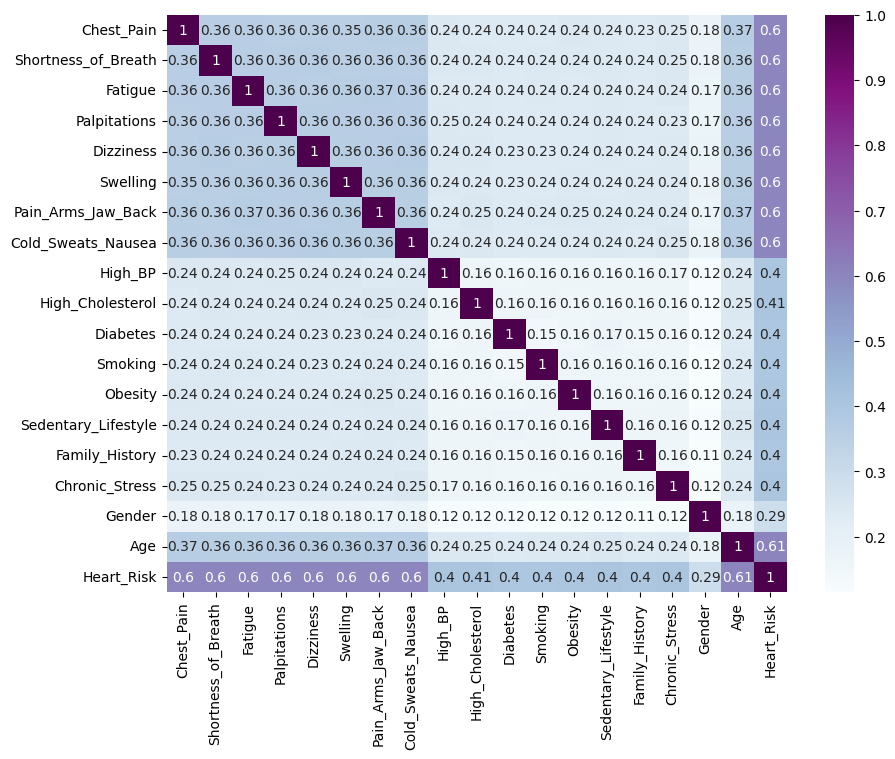

In [8]:
#finding correlation between the features
import seaborn as sns
import matplotlib.pyplot as plt
corr_var=dataset.corr(numeric_only=True) # added numeric_only=True
print(corr_var)
plt.figure(figsize=(10,7.5)) #matplotlib.pyplot is now imported as plt
sns.heatmap(corr_var, annot=True, cmap='BuPu') #seaborn is now imported as sns
plt.show()



In [9]:
#as there is no importance in cust id, row no and sur name for modelling we are not included here in independent feature
X = dataset.iloc[:, 3:-1].values
#target value
y = dataset.iloc[:, -1].values

In [10]:
#independent features
print(X)

[[ 1.  0.  0. ...  0.  0. 48.]
 [ 1.  0.  0. ...  0.  0. 46.]
 [ 1.  0.  0. ...  0.  1. 66.]
 ...
 [ 0.  0.  0. ...  1.  1. 53.]
 [ 1.  1.  0. ...  0.  1. 57.]
 [ 1.  1.  1. ...  1.  0. 51.]]


In [11]:
#dependent features
print(y)

[0. 0. 0. ... 0. 1. 1.]


In [12]:
#as we have two columns as categorical terms we go for encoding we need to convert to numericals
#Categorical encoding

#gender will have some correlation with other feature so we go for label encoding
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
#gender column in index 2
X[:, 2] = le.fit_transform(X[:, 2])

In [13]:
print(X)

[[ 1.  0.  0. ...  0.  0. 48.]
 [ 1.  0.  0. ...  0.  0. 46.]
 [ 1.  0.  0. ...  0.  1. 66.]
 ...
 [ 0.  0.  0. ...  1.  1. 53.]
 [ 1.  1.  0. ...  0.  1. 57.]
 [ 1.  1.  1. ...  1.  0. 51.]]


In [14]:
#country name wont be that much correlation added it has more than 2 names so go for one hot encoding
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
#country name is present in 1st index value
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [1])], remainder='passthrough')
X = np.array(ct.fit_transform(X))

In [15]:
print(X)

[[ 1.  0.  1. ...  0.  0. 48.]
 [ 1.  0.  1. ...  0.  0. 46.]
 [ 1.  0.  1. ...  0.  1. 66.]
 ...
 [ 1.  0.  0. ...  1.  1. 53.]
 [ 0.  1.  1. ...  0.  1. 57.]
 [ 0.  1.  1. ...  1.  0. 51.]]


In [16]:
#training and testing split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [17]:
#feature scaling is an important and mandatory for ann process before modelling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [18]:

#ANN - initializing
ann = tf.keras.models.Sequential()

In [23]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam, SGD, RMSprop
from sklearn.metrics import accuracy_score, log_loss
from tabulate import tabulate

# Define model architecture
def build_model():
    model = Sequential()
    model.add(Dense(64, input_dim=X.shape[1], activation='relu'))
    model.add(Dropout(0.3))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(16, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    return model

# === Store results ===
history_dict = {}
results = []
epochs = 30

# Keras Optimizers to compare
optimizers = {
    "Adam": Adam(),
    "SGD": SGD(),
    "RMSprop": RMSprop()
}

# Train & Evaluate each
for name, opt in optimizers.items():
    print(f"\nTraining with {name} Optimizer")
    model_temp = build_model()
    model_temp.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])
    history = model_temp.fit(X_train, y_train, epochs=epochs, verbose=1, batch_size=32)
    history_dict[name] = history.history
    y_pred_prob = model_temp.predict(X_test)
    y_pred_bin = (y_pred_prob > 0.5).astype(int)
    acc = accuracy_score(y_test, y_pred_bin)
    loss = log_loss(y_test, y_pred_prob)
    results.append([name, epochs, round(acc, 4), round(loss, 4)])


# Display comparison table
headers = ["Optimizer", "Epochs", "Accuracy", "Loss"]
print("\n📊 Keras Optimizer Comparison with Epochs:")
print(tabulate(results, headers=headers, tablefmt="fancy_grid"))



Training with Adam Optimizer
Epoch 1/30


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1532/1532 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9171 - loss: 0.1613
Epoch 2/30
1532/1532 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9817 - loss: 0.0511
Epoch 3/30
1532/1532 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9824 - loss: 0.0503
Epoch 4/30
1532/1532 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9820 - loss: 0.0497
Epoch 5/30
1532/1532 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9824 - loss: 0.0498
Epoch 6/30
1532/1532 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9823 - loss: 0.0503
Epoch 7/30
1532/1532 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9838 - loss: 0.0485
Epoch 8/30
1532/1532 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9826 - loss: 0.0488
Epoch 9/30
1532/1532 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9835 - loss: 0.0471
Epoch 10/30
1532/1532 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9832 - loss: 0.0483
Epoch 11/30
1532/1532 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9853 - loss: 0.0449
Epoch 12/30
1532/1532 ━━━━━━━━━━━━━━━━━━━

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1532/1532 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8602 - loss: 0.3191
Epoch 2/30
1532/1532 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9779 - loss: 0.0629
Epoch 3/30
1532/1532 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9794 - loss: 0.0595
Epoch 4/30
1532/1532 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.9784 - loss: 0.0607
Epoch 5/30
1532/1532 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9802 - loss: 0.0549
Epoch 6/30
1532/1532 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9802 - loss: 0.0562
Epoch 7/30
1532/1532 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9809 - loss: 0.0543
Epoch 8/30
1532/1532 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9812 - loss: 0.0532
Epoch 9/30
1532/1532 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9806 - loss: 0.0553
Epoch 10/30
1532/1532 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9812 - loss: 0.0547
Epoch 11/30
1532/1532 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9815 - loss: 0.0538
Epoch 12/30
1532/1532 ━━━━━━━━━━━━━━━━━━━

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1532/1532 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9652 - loss: 0.1082
Epoch 2/30
1532/1532 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9803 - loss: 0.0558
Epoch 3/30
1532/1532 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9820 - loss: 0.0526
Epoch 4/30
1532/1532 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9815 - loss: 0.0535
Epoch 5/30
1532/1532 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9820 - loss: 0.0515
Epoch 6/30
1532/1532 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9821 - loss: 0.0522
Epoch 7/30
1532/1532 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9821 - loss: 0.0516
Epoch 8/30
1532/1532 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9820 - loss: 0.0518
Epoch 9/30
1532/1532 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9823 - loss: 0.0510
Epoch 10/30
1532/1532 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9835 - loss: 0.0476
Epoch 11/30
1532/1532 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9819 - loss: 0.0503
Epoch 12/30
1532/1532 ━━━━━━━━━━━━━━━━━━━

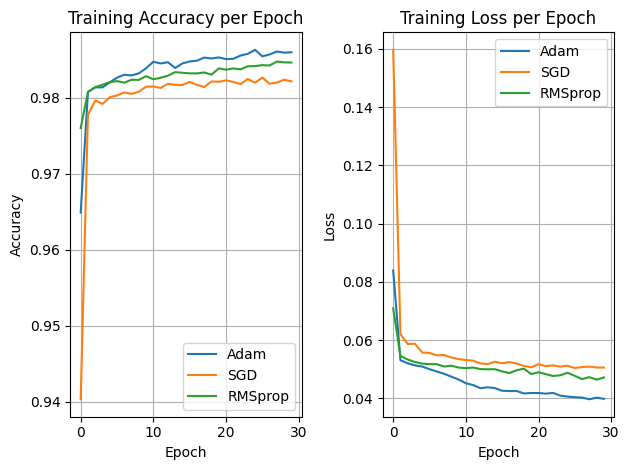

In [26]:
plt.subplot(1, 2, 1)
for name in history_dict:
    plt.plot(history_dict[name]['accuracy'], label=name)
plt.title('Training Accuracy per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend()

# Loss Plot
plt.subplot(1, 2, 2)
for name in history_dict:
    plt.plot(history_dict[name]['loss'], label=name)
plt.title('Training Loss per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()